In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pokemon = pd.read_csv("/content/Pokemon_short.csv", index_col=0)

In [ ]:
#Head del df
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
#Veamos el shape
pokemon.shape

(800, 12)

In [ ]:
#Totalidad de registros por columnas
pokemon.count()

Name          800
Type 1        800
Type 2        414
Total         800
HP            800
Attack        800
Defense       800
Sp. Atk       800
Sp. Def       800
Speed         800
Generation    800
Legendary     800
dtype: int64

In [ ]:
#Tipo de dato de cada columna
pokemon.dtypes

Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [ ]:
#Principales medidas estadisticas
pokemon.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.0,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.0,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.0,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.0,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.0,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.0,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.0,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.0,6.0


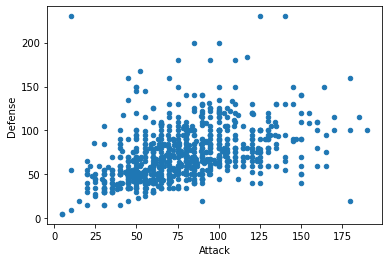

In [ ]:
#Scatterplot
pokemon.plot.scatter(x='Attack', y='Defense')

In [ ]:
pokemon[['Attack','Defense']].corr()

,Attack,Defense
Attack,1.000000,0.438687
Defense,0.438687,1.000000


Hexplot

Una gráfica hexagonal agrega puntos en el espacio en hexágonos y luego colorea esos hexágonos según los valores dentro de ellos.

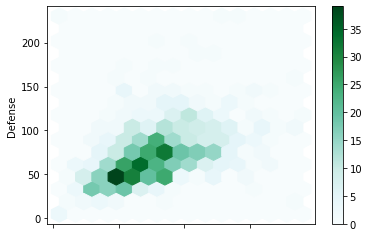

In [ ]:
pokemon.plot.hexbin(x='Attack', y='Defense', gridsize=15)

In [ ]:
#Filtramos la data y realizamos una agrupacion
pokemon_stats_legendary = pokemon.groupby(['Legendary', 'Generation']).mean()[['Attack', 'Defense']]
pokemon_stats_legendary

Attack     Defense
Legendary Generation                        
False     1            74.981250   70.175000
          2            70.693069   72.118812
          3            76.971831   69.901408
          4            79.620370   75.074074
          5            78.246667   70.486667
          6            70.459459   74.013514
True      1           120.833333   89.166667
          2            99.000000   99.000000
          3           118.333333  107.222222
          4           109.846154  103.538462
          5           120.266667   90.733333
          6           125.250000  101.375000

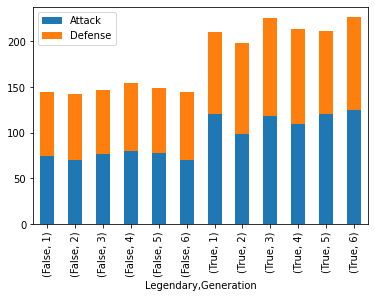

In [ ]:
pokemon_stats_legendary.plot.bar(stacked=True)

In [ ]:
#Generamos otro dataset
pokemon_stats_by_generation = pokemon.groupby('Generation').mean()[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
pokemon_stats_by_generation

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Generation,,,,,,
1,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337
2,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321
3,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000
4,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843
5,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788
6,68.268293,75.804878,76.682927,74.292683,74.890244,66.439024


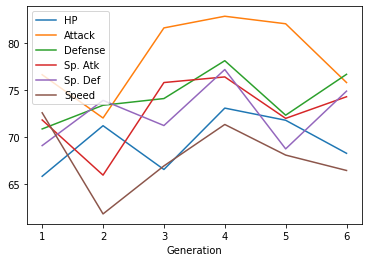

In [ ]:
pokemon_stats_by_generation.plot.line()

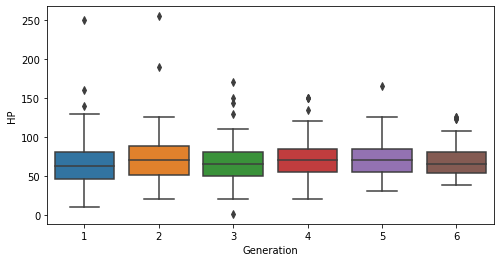

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="Generation", y='HP', data=pokemon, ax=ax)

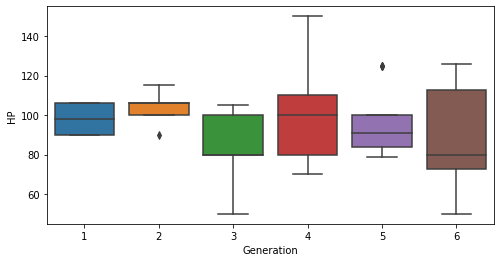

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="Generation", y='HP', data=pokemon.loc[pokemon.Legendary ==True,], ax=ax)

In [ ]:
#! pip install pingouin
import pingouin as pg
pg.anova(data=pokemon.loc[pokemon.Legendary ==True,], dv='HP', between='Generation', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Generation,4187.928205,5,837.585641,1.899899,0.107991,0.13868
1,Within,26010.625641,59,440.858062,NaN,NaN,NaN


In [ ]:
pg.pairwise_tukey(data=pokemon.loc[pokemon.Legendary ==True,],  dv='HP', between='Generation').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,98.000,103.400,-5.400,12.714,-0.425,0.998,-0.235
1,1,3,98.000,81.667,16.333,9.898,1.650,0.569,0.751
2,1,4,98.000,100.846,-2.846,10.363,-0.275,1.000,-0.129
3,1,5,98.000,96.133,1.867,10.142,0.184,1.000,0.085
4,1,6,98.000,87.500,10.500,11.339,0.926,0.938,0.468
5,2,3,103.400,81.667,21.733,10.614,2.048,0.329,0.998
6,2,4,103.400,100.846,2.554,11.049,0.231,1.000,0.116
7,2,5,103.400,96.133,7.267,10.843,0.670,0.985,0.331
8,2,6,103.400,87.500,15.900,11.970,1.328,0.768,0.704
9,3,4,81.667,100.846,-19.179,7.642,-2.510,0.138,-0.890


Para más información de la prueba Anova y Tukey : https://www.cienciadedatos.net/documentos/pystats09-analisis-de-varianza-anova-python.html


In [ ]:
from scipy.stats import ks_2samp

In [ ]:
pokemon_lengendary=pokemon.loc[pokemon.Legendary ==True,]

In [ ]:
ks_2samp(
    pokemon_lengendary.loc[pokemon_lengendary.Generation == 1,"HP"],
    pokemon_lengendary.loc[pokemon_lengendary.Generation == 3,"HP"]
    )

KstestResult(statistic=0.6111111111111112, pvalue=0.05344883949002932)

Para más información de la prueba no parametrica test Kolmogorov–Smirnov: https://www.cienciadedatos.net/documentos/pystats08-comparacion-distribuciones-test-kolmogorov-smirnov-python.html
